Training Part

In [2]:
import os
import numpy as np
import cv2
from sklearn.decomposition import DictionaryLearning
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt

# === Setup paths ===
base_path = r"C:\Users\Bhushan N\Desktop\SEM- 2\IE506-ML\Project\novelty\DATA"
classification_path = os.path.join(base_path, "classification")

# === Parameters ===
img_size = (64, 64)
n_features = img_size[0] * img_size[1]
n_components = 100

# === Load training images ===
X_train = []
y_train = []
class_labels = []

folders = sorted(os.listdir(classification_path))
for idx, folder in enumerate(folders):
    folder_path = os.path.join(classification_path, folder)
    class_labels.append(folder)
    for file in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, file), cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, img_size).flatten() / 255.0
        X_train.append(img)
        y_train.append(idx)

X_train = np.array(X_train)
y_train = np.array(y_train)

# === Dictionary Learning ===
dict_learner = DictionaryLearning(n_components=n_components, alpha=1, transform_algorithm='lasso_lars')
A_star = dict_learner.fit_transform(X_train)
D_star = normalize(dict_learner.components_, axis=1)

print(f"✅ Training data X shape: {X_train.shape}")
print(f"✅ Dictionary D* shape: {D_star.shape}")
print(f"✅ Sparse codes A* shape: {A_star.shape}")

# === Assign atoms to classes ===
atom_class_map = np.zeros(n_components, dtype=int)
for k in range(n_components):
    class_responses = []
    for i in range(len(class_labels)):
        mask = (y_train == i)
        response = np.mean(np.abs(A_star[mask, k]))
        class_responses.append(response)
    atom_class_map[k] = np.argmax(class_responses)
    
# === Print Trained Dictionary and Alpha values ===
print("\n✅ Trained Dictionary (D*):")
print(D_star)

print("\n✅ Trained Alpha values (A*):")
print(A_star)



✅ Training data X shape: (165, 4096)
✅ Dictionary D* shape: (100, 4096)
✅ Sparse codes A* shape: (165, 100)

✅ Trained Dictionary (D*):
[[0.01842122 0.01843128 0.01842686 ... 0.01859872 0.01837309 0.01871641]
 [0.01855453 0.02087599 0.02068713 ... 0.01783548 0.01874354 0.01802051]
 [0.01861918 0.02081836 0.02079144 ... 0.01738345 0.01888451 0.01841824]
 ...
 [0.01949733 0.01951125 0.01949877 ... 0.01831466 0.01790062 0.01833043]
 [0.02073251 0.02073258 0.02073396 ... 0.00648882 0.00778667 0.00824694]
 [0.01953722 0.0195385  0.01953723 ... 0.01768654 0.01782081 0.01792473]]

✅ Trained Alpha values (A*):
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [12.88367914  0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
  50.1790267 ]
 [ 0.          0.   

Testing 19 test Images

load C:\Users\Bhushan N\AppData\Roaming\Python\Python312\site-packages\ortools\.libs\zlib1.dll...
load C:\Users\Bhushan N\AppData\Roaming\Python\Python312\site-packages\ortools\.libs\abseil_dll.dll...
load C:\Users\Bhushan N\AppData\Roaming\Python\Python312\site-packages\ortools\.libs\utf8_validity.dll...
load C:\Users\Bhushan N\AppData\Roaming\Python\Python312\site-packages\ortools\.libs\re2.dll...
load C:\Users\Bhushan N\AppData\Roaming\Python\Python312\site-packages\ortools\.libs\libprotobuf.dll...
load C:\Users\Bhushan N\AppData\Roaming\Python\Python312\site-packages\ortools\.libs\highs.dll...
load C:\Users\Bhushan N\AppData\Roaming\Python\Python312\site-packages\ortools\.libs\ortools.dll...
(CVXPY) May 24 08:06:03 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.12.4544). Expected < 9.12.0. Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) May 24 08:06:03 PM: Encountered unexpected e

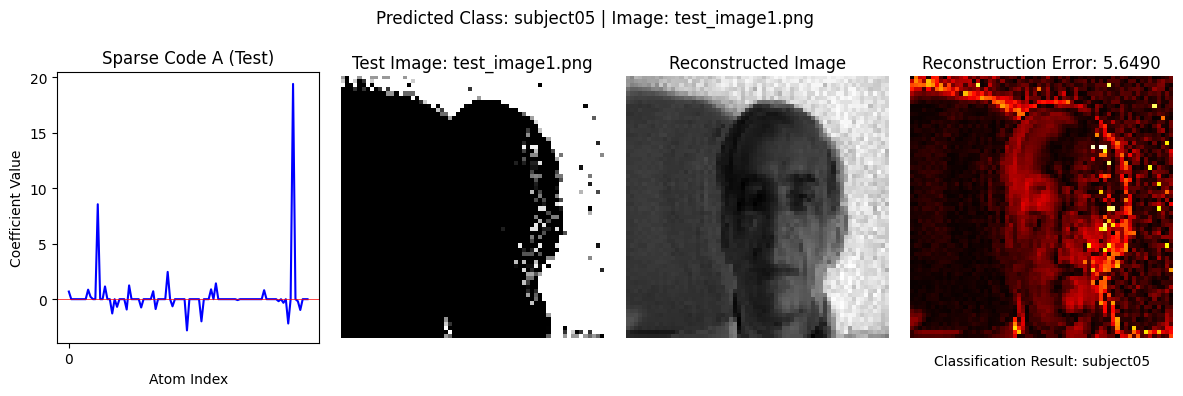


🔍 Processing test_image10.png
✅ Test image vector x shape: (4096,)
✅ Compressed alpha* shape: (100,)
✅ Reconstructed x shape: (4096,)
✅ Error e* shape: (4096,)
✅ Predicted class: subject15


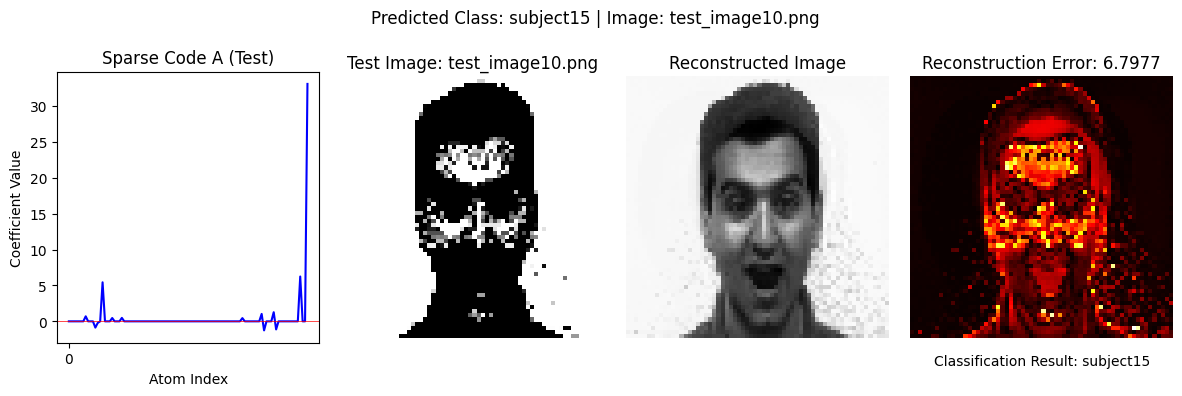


🔍 Processing test_image11.png
✅ Test image vector x shape: (4096,)
✅ Compressed alpha* shape: (100,)
✅ Reconstructed x shape: (4096,)
✅ Error e* shape: (4096,)
✅ Predicted class: subject02


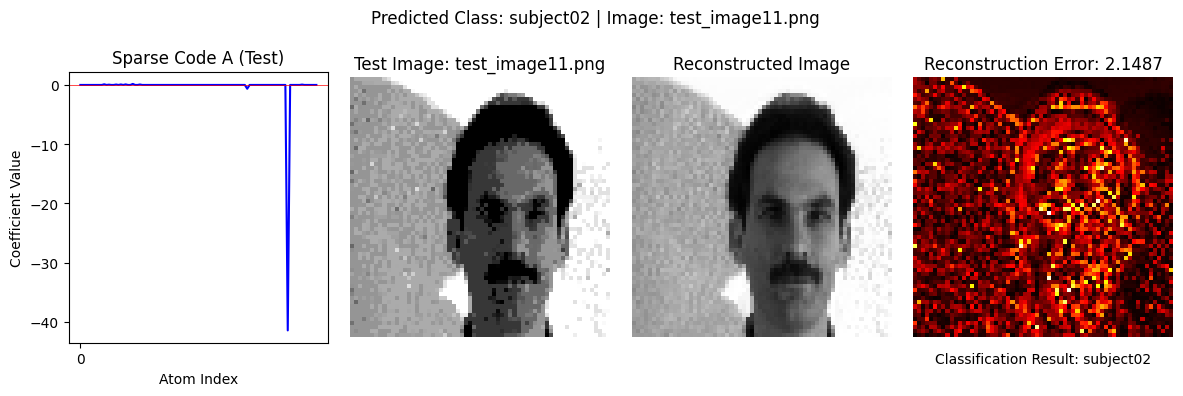


🔍 Processing test_image12.png
✅ Test image vector x shape: (4096,)
✅ Compressed alpha* shape: (100,)
✅ Reconstructed x shape: (4096,)
✅ Error e* shape: (4096,)
✅ Predicted class: subject10


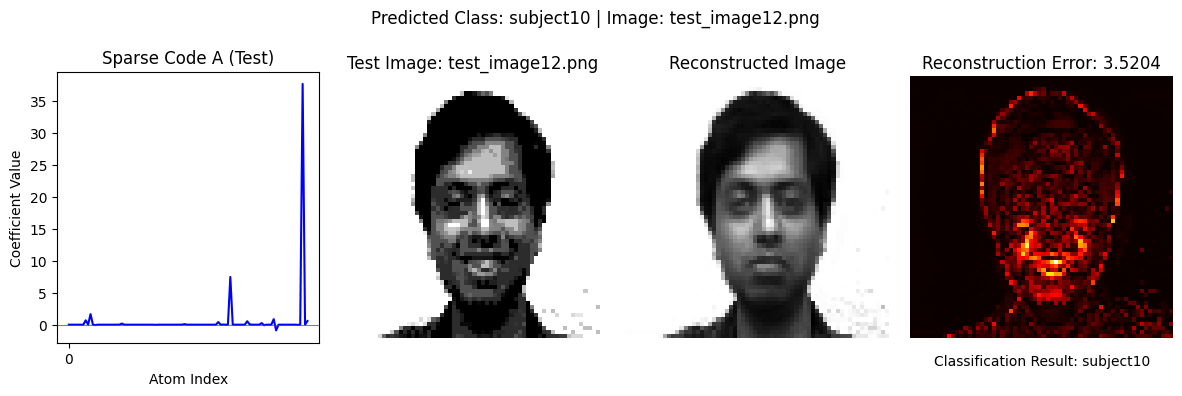


🔍 Processing test_image13.png
✅ Test image vector x shape: (4096,)
✅ Compressed alpha* shape: (100,)
✅ Reconstructed x shape: (4096,)
✅ Error e* shape: (4096,)
✅ Predicted class: subject10


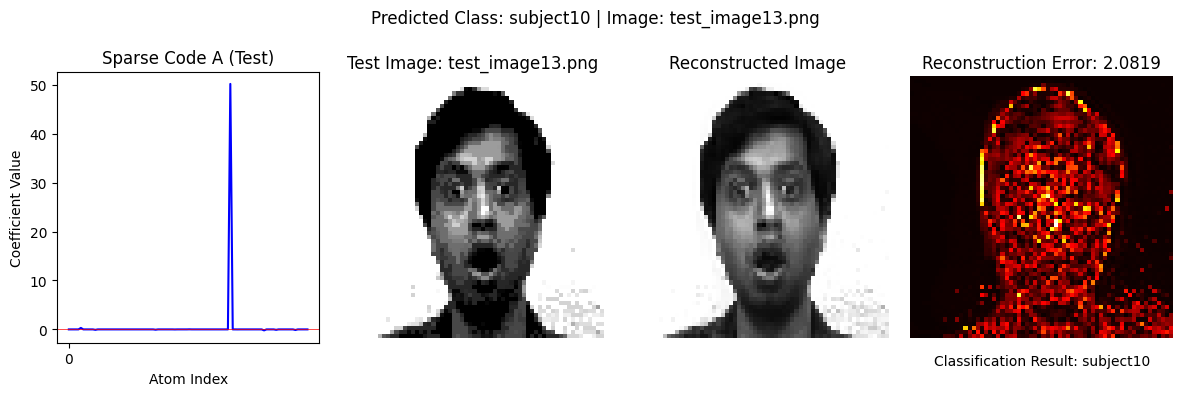


🔍 Processing test_image14.png
✅ Test image vector x shape: (4096,)
✅ Compressed alpha* shape: (100,)
✅ Reconstructed x shape: (4096,)
✅ Error e* shape: (4096,)
✅ Predicted class: subject10


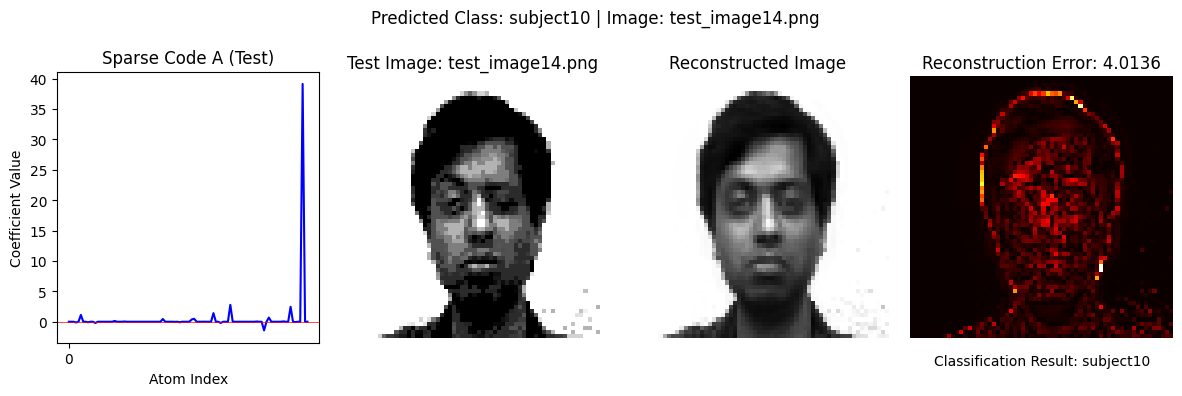


🔍 Processing test_image15.png
✅ Test image vector x shape: (4096,)
✅ Compressed alpha* shape: (100,)
✅ Reconstructed x shape: (4096,)
✅ Error e* shape: (4096,)
✅ Predicted class: subject12


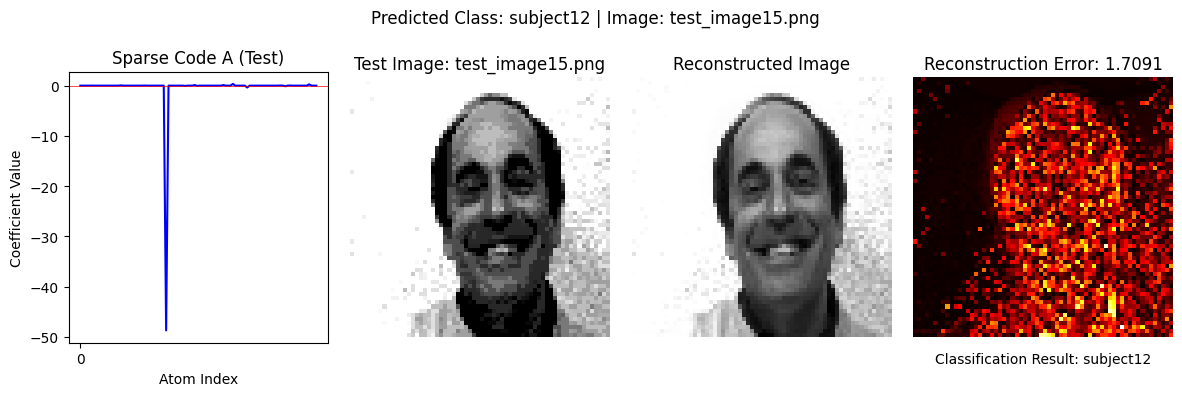


🔍 Processing test_image16.png
✅ Test image vector x shape: (4096,)
✅ Compressed alpha* shape: (100,)
✅ Reconstructed x shape: (4096,)
✅ Error e* shape: (4096,)
✅ Predicted class: subject12


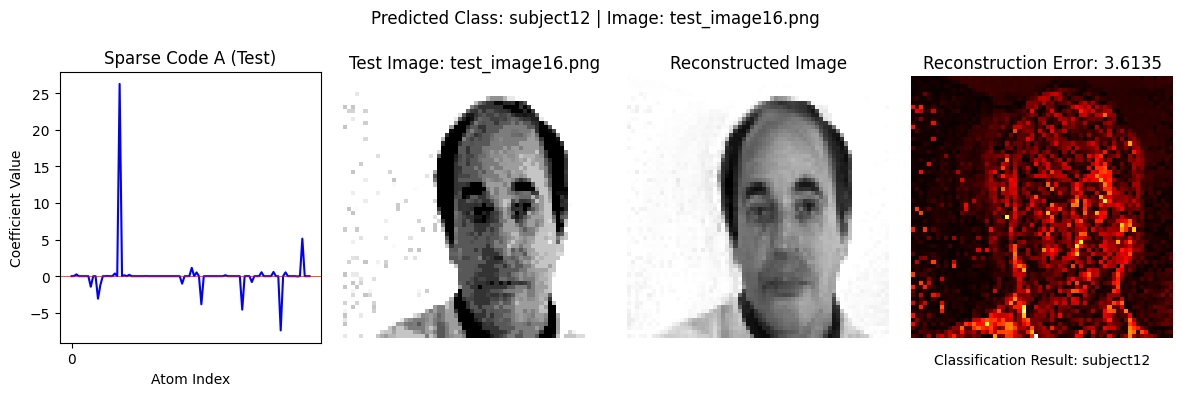


🔍 Processing test_image17.png
✅ Test image vector x shape: (4096,)
✅ Compressed alpha* shape: (100,)
✅ Reconstructed x shape: (4096,)
✅ Error e* shape: (4096,)
✅ Predicted class: subject13


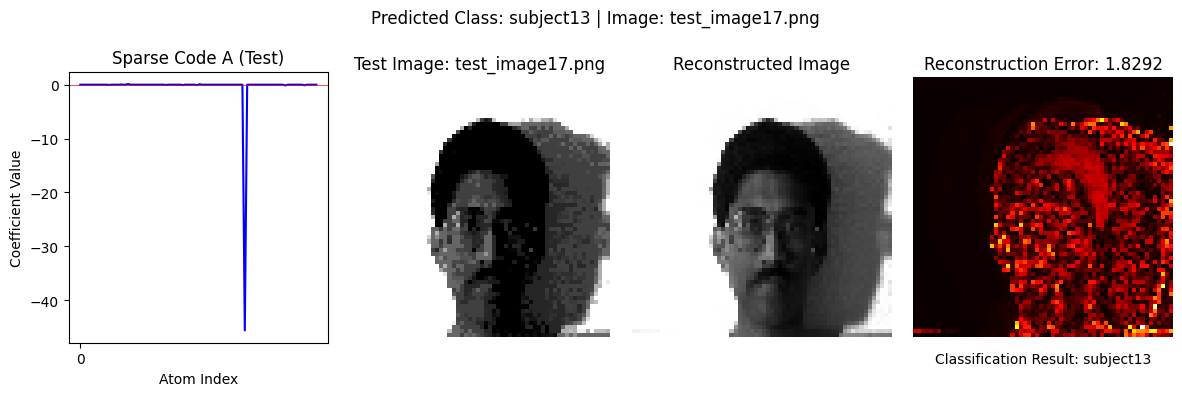


🔍 Processing test_image18.png
✅ Test image vector x shape: (4096,)
✅ Compressed alpha* shape: (100,)
✅ Reconstructed x shape: (4096,)
✅ Error e* shape: (4096,)
✅ Predicted class: subject14


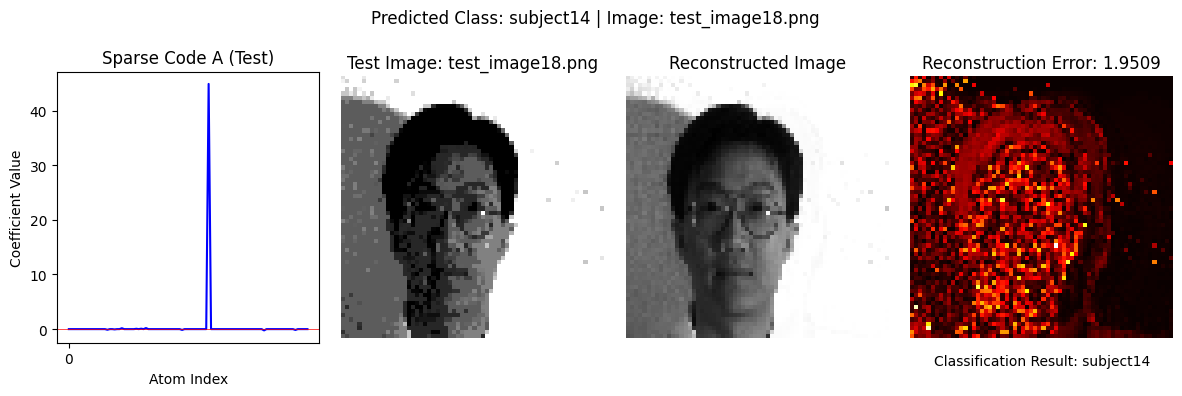


🔍 Processing test_image19.png
✅ Test image vector x shape: (4096,)
✅ Compressed alpha* shape: (100,)
✅ Reconstructed x shape: (4096,)
✅ Error e* shape: (4096,)
✅ Predicted class: subject15


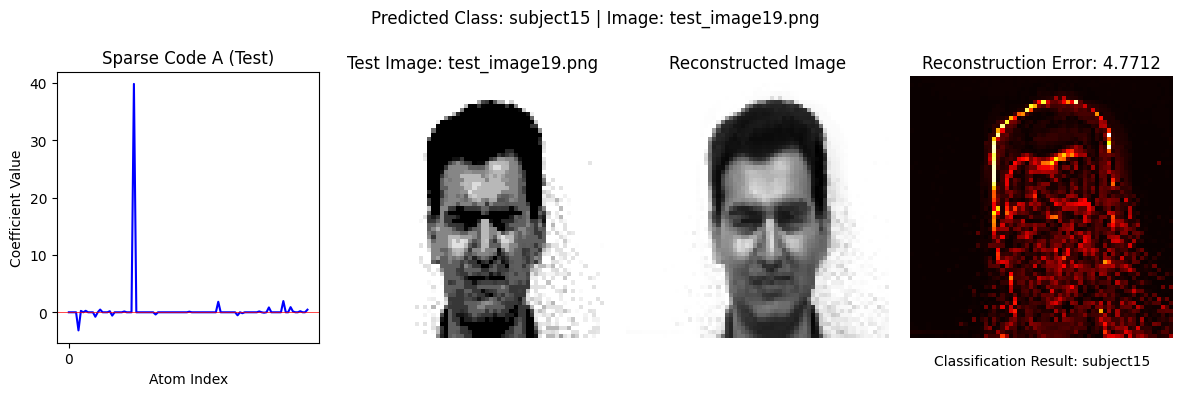


🔍 Processing test_image2.png
✅ Test image vector x shape: (4096,)
✅ Compressed alpha* shape: (100,)
✅ Reconstructed x shape: (4096,)
✅ Error e* shape: (4096,)
✅ Predicted class: subject01


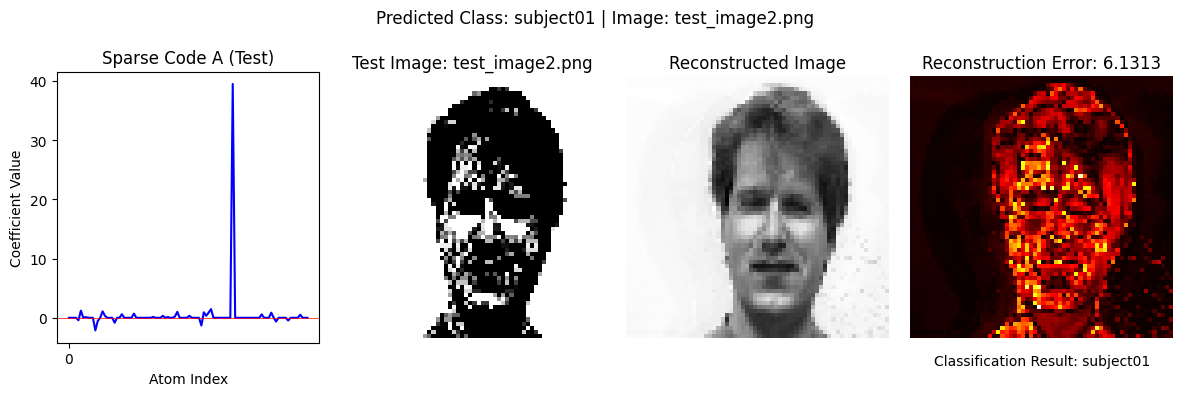


🔍 Processing test_image3.png
✅ Test image vector x shape: (4096,)
✅ Compressed alpha* shape: (100,)
✅ Reconstructed x shape: (4096,)
✅ Error e* shape: (4096,)
✅ Predicted class: subject03


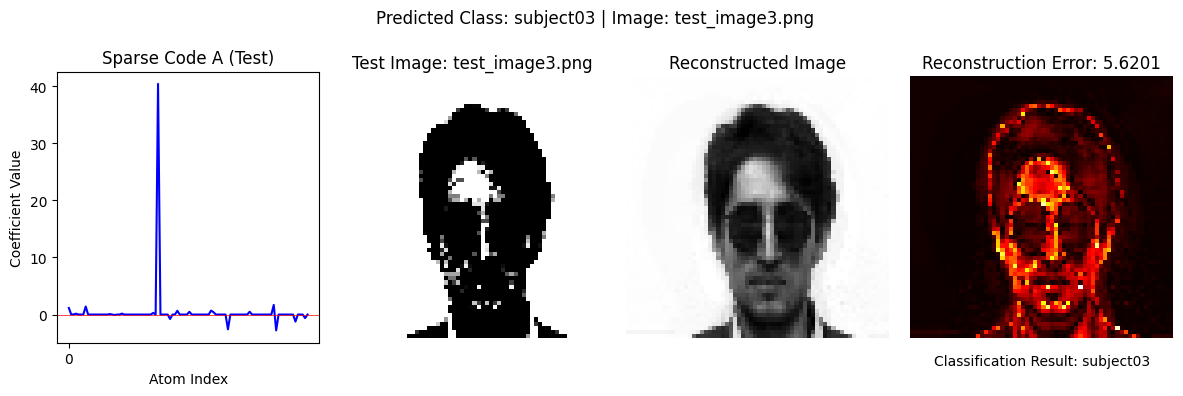


🔍 Processing test_image4.png
✅ Test image vector x shape: (4096,)
✅ Compressed alpha* shape: (100,)
✅ Reconstructed x shape: (4096,)
✅ Error e* shape: (4096,)
✅ Predicted class: subject04


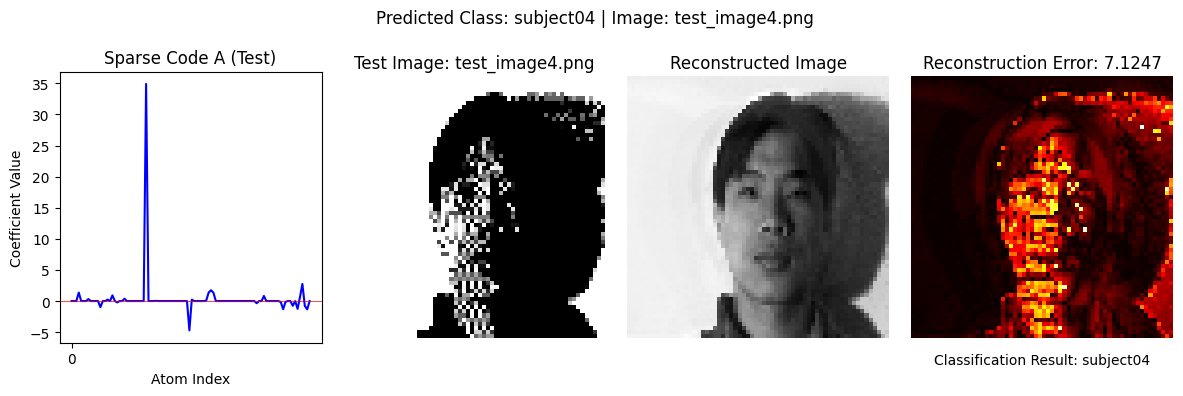


🔍 Processing test_image5.png
✅ Test image vector x shape: (4096,)
✅ Compressed alpha* shape: (100,)
✅ Reconstructed x shape: (4096,)
✅ Error e* shape: (4096,)
✅ Predicted class: subject07


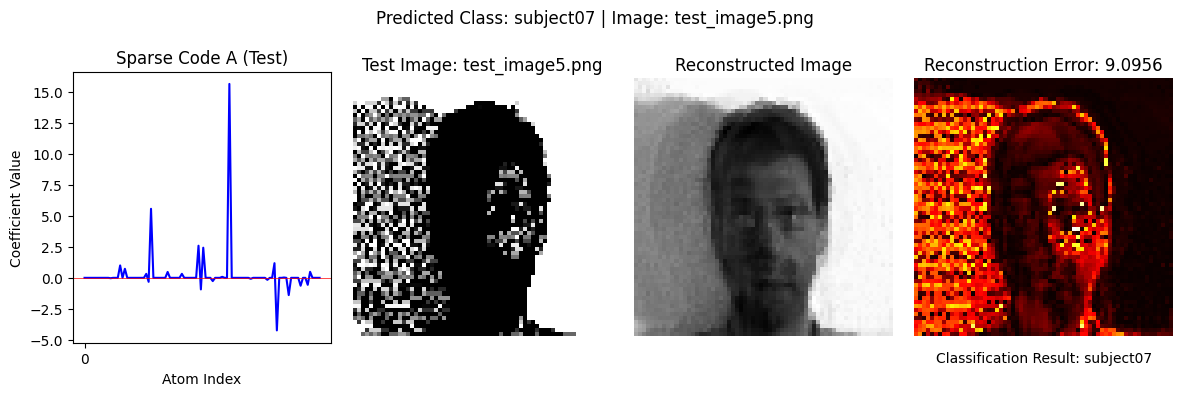


🔍 Processing test_image6.png
✅ Test image vector x shape: (4096,)
✅ Compressed alpha* shape: (100,)
✅ Reconstructed x shape: (4096,)
✅ Error e* shape: (4096,)
✅ Predicted class: subject06


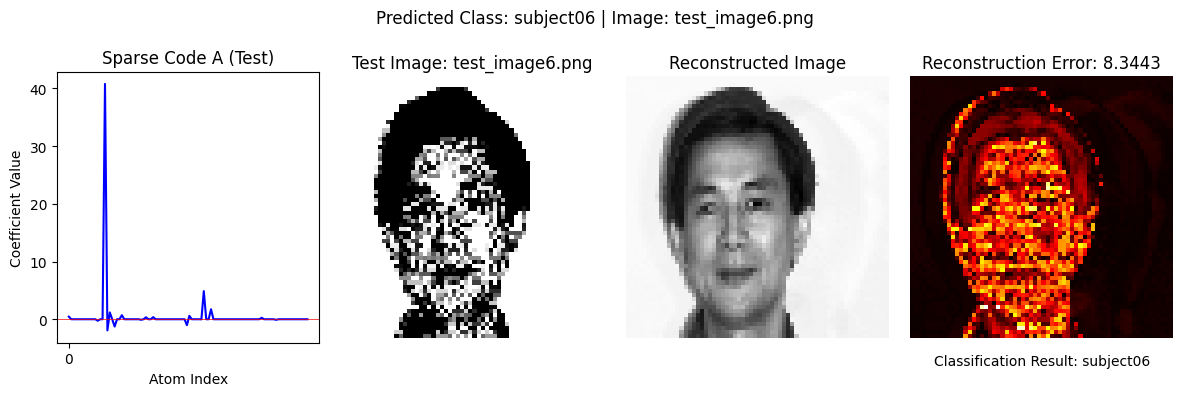


🔍 Processing test_image7.png
✅ Test image vector x shape: (4096,)
✅ Compressed alpha* shape: (100,)
✅ Reconstructed x shape: (4096,)
✅ Error e* shape: (4096,)
✅ Predicted class: subject08


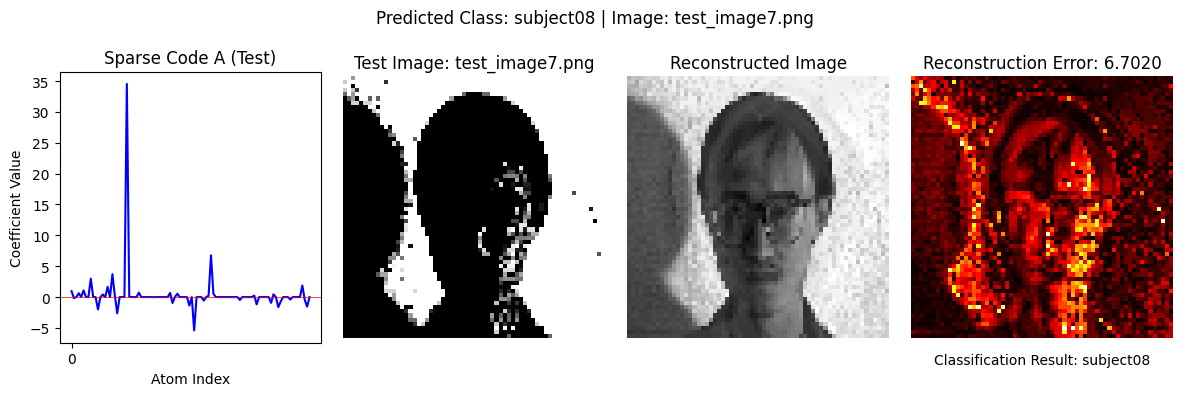


🔍 Processing test_image8.png
✅ Test image vector x shape: (4096,)
✅ Compressed alpha* shape: (100,)
✅ Reconstructed x shape: (4096,)
✅ Error e* shape: (4096,)
✅ Predicted class: subject11


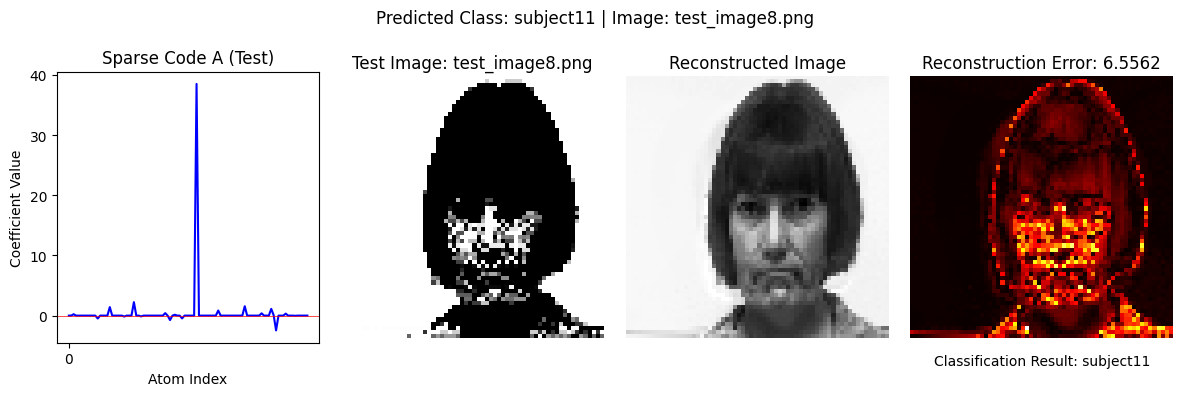


🔍 Processing test_image9.png
✅ Test image vector x shape: (4096,)
✅ Compressed alpha* shape: (100,)
✅ Reconstructed x shape: (4096,)
✅ Error e* shape: (4096,)
✅ Predicted class: subject13


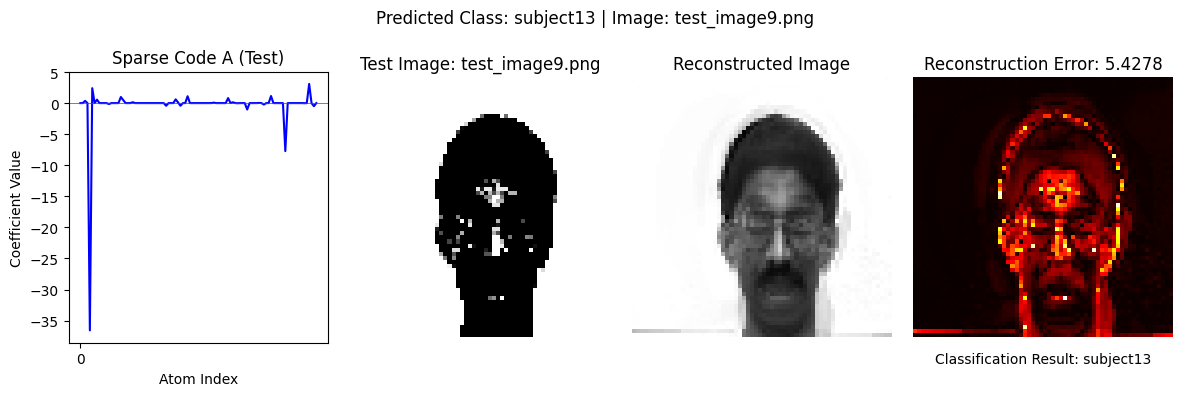

In [3]:
from cvxpy import Variable, Minimize, Problem, norm1, norm2
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

# === Test image path ===
test_images_path = os.path.join(base_path, "test_images")

# === Regularization parameters ===
alpha_lambda = 0.1
e_lambda = 0.1

# === Process each test image ===
test_imgs = sorted(os.listdir(test_images_path))
for test_img_name in test_imgs:
    print(f"\n🔍 Processing {test_img_name}")
    test_img = cv2.imread(os.path.join(test_images_path, test_img_name), cv2.IMREAD_GRAYSCALE)
    test_img = cv2.resize(test_img, img_size).flatten() / 255.0

    x = test_img
    n = len(x)

    # === Solve: x = Dα + e ===
    alpha = Variable(n_components)
    e = Variable(n)
    objective = Minimize(norm2(x - D_star.T @ alpha - e)**2 + alpha_lambda * norm1(alpha) + e_lambda * norm1(e))
    problem = Problem(objective)
    problem.solve()

    alpha_star = alpha.value
    e_star = e.value
    x_recon = D_star.T @ alpha_star

    # === Classification ===
    residuals = []
    for i in range(len(class_labels)):
        mask = (atom_class_map == i)
        alpha_i = np.zeros_like(alpha_star)
        alpha_i[mask] = alpha_star[mask]
        x_i = D_star.T @ alpha_i
        residuals.append(np.linalg.norm(x - x_i - e_star))

    pred_class_idx = int(np.argmin(residuals))
    pred_class = class_labels[pred_class_idx]

    # === Output ===
    print(f"✅ Test image vector x shape: {x.shape}")
    print(f"✅ Compressed alpha* shape: {alpha_star.shape}")
    print(f"✅ Reconstructed x shape: {x_recon.shape}")
    print(f"✅ Error e* shape: {e_star.shape}")
    print(f"✅ Predicted class: {pred_class}")

    # === Plot Results ===
    plt.figure(figsize=(12, 4))

    # Sparse Code A (Alpha) Plot
    plt.subplot(1, 4, 1)
    plt.title("Sparse Code A (Test)")
    plt.plot(alpha_star, 'b-')
    plt.axhline(y=0, color='r', linestyle='-', linewidth=0.5)
    plt.xlabel("Atom Index")
    plt.ylabel("Coefficient Value")
    plt.xticks(np.arange(0, n_components, 100))

    # Test Image
    plt.subplot(1, 4, 2)
    plt.title(f"Test Image: {test_img_name}")
    plt.imshow(x.reshape(img_size), cmap='gray')
    plt.axis('off')

    # Reconstructed Image
    plt.subplot(1, 4, 3)
    plt.title("Reconstructed Image")
    plt.imshow(np.clip(x_recon, 0, 1).reshape(img_size), cmap='gray')
    plt.axis('off')

    # Reconstruction Error
    plt.subplot(1, 4, 4)
    plt.title(f"Reconstruction Error: {np.linalg.norm(x - x_recon):.4f}")
    plt.imshow(np.abs(x - x_recon).reshape(img_size), cmap='hot')
    plt.axis('off')
    plt.text(0.5, -0.1, f"Classification Result: {pred_class}", transform=plt.gca().transAxes, ha='center')

    plt.suptitle(f"Predicted Class: {pred_class} | Image: {test_img_name}")
    plt.tight_layout()
    plt.show()